In [1]:
import numpy as np
import matplotlib.pyplot as plt
from materials import AlGaAsx,Air,GaAs,AlAs
from SuperlatticeTMM.cavities import OpticalCavity,Resonator
from SuperlatticeTMM.raman import *

In [68]:
wl_DBR = 915
wl_range = np.arange(750,1051,1)
freq_range = np.arange(15.4,21.4,0.01)
gaas_mod = AlGaAsx(0.1)
alas_mod = AlGaAsx(0.95)
opt = OpticalCavity([gaas_mod,alas_mod],[wl_DBR/4./GaAs.n,wl_DBR/4./Alas.n],915, entry=GaAs, exit=Air, p=(18,14), spacer=(GaAs,wl_DBR/2.0/GaAs.n))
reso = Resonator([gaas_mod,alas_mod],[wl_DBR/4./GaAs.n,wl_DBR/4./Alas.n],4780/18.4, entry=GaAs, exit=GaAs, p=(18,14), spacer=(GaAs,wl_DBR/2.0/GaAs.n))

NameError: name 'Alas' is not defined

Text(0, 0.5, 'Ac.Reflectivity')

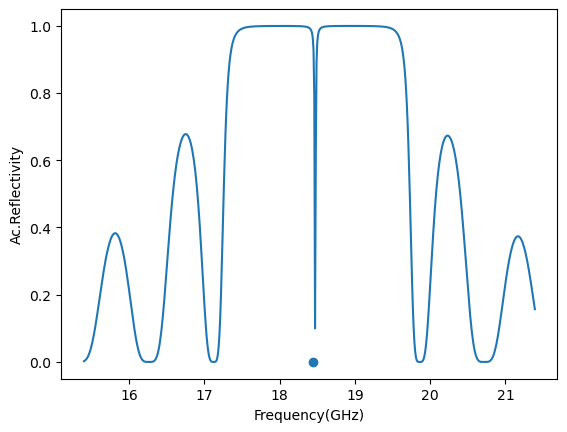

In [17]:
refs = []
for freq in freq_range:
    reso = Resonator([gaas_mod,alas_mod],[wl_DBR/4./GaAs.n,wl_DBR/4./AlAs.n],4780/freq, entry=GaAs, exit=GaAs, p=(18,14), spacer=(GaAs,0.5*wl_DBR/GaAs.n))
    a, b = reso.build_TM() @ np.array([1,0])
    refs.append(abs(b/a)**2)
plt.scatter([18.44],[0])
plt.plot(freq_range,refs)
plt.xlabel("Frequency(GHz)")
plt.ylabel("Ac.Reflectivity")
#plt.savefig('hybrid_ac_refl.png',dpi=300)

4868.0

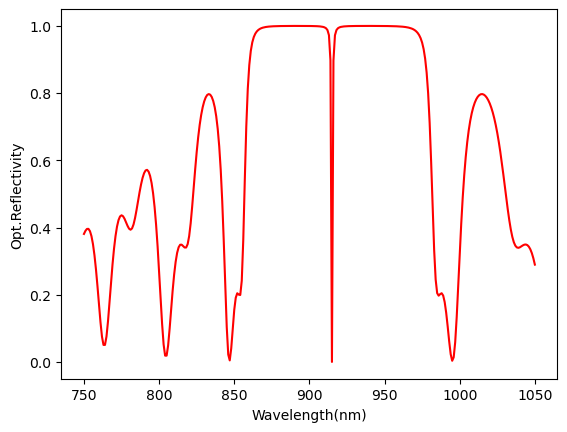

In [29]:
plt.plot(wl_range,opt.calc_spectra(wl_range),'r')
plt.xlabel('Wavelength(nm)')
plt.ylabel('Opt.Reflectivity')
#plt.savefig('hybrid_opt_refl.png', dpi=300)

In [66]:
freqs_raman = np.arange(17,19,0.05)
raman_powers = []
for freq in freqs_raman:
    opt = OpticalCavity([gaas_mod,alas_mod],[wl_DBR/4./gaas_mod.n,wl_DBR/4./alas_mod.n],4780/freq, entry=GaAs, exit=Air, p=(18,14),spacer=(gaas_mod,wl_DBR/2.0/gaas_mod.n))
    reso = Resonator([gaas_mod,alas_mod],[wl_DBR/4./gaas_mod.n,wl_DBR/4./alas_mod.n],4780/freq, entry=GaAs, exit=Air, p=(18,14),spacer=(gaas_mod,wl_DBR/2/gaas_mod.n))
    raman_powers.append(detection_spectrum(opt,reso))

Text(0, 0.5, 'Power(a.u)')

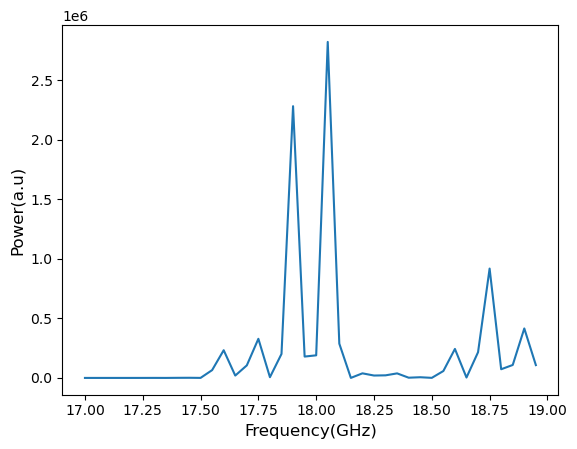

In [67]:
plt.plot(freqs_raman,raman_powers)
plt.xlabel("Frequency(GHz)",fontsize=12)
plt.ylabel("Power(a.u)",fontsize=12)
#plt.ylim(1e+14,1e+17)
#plt.yscale('log')
#plt.savefig('raman_spectra.png',dpi=300)

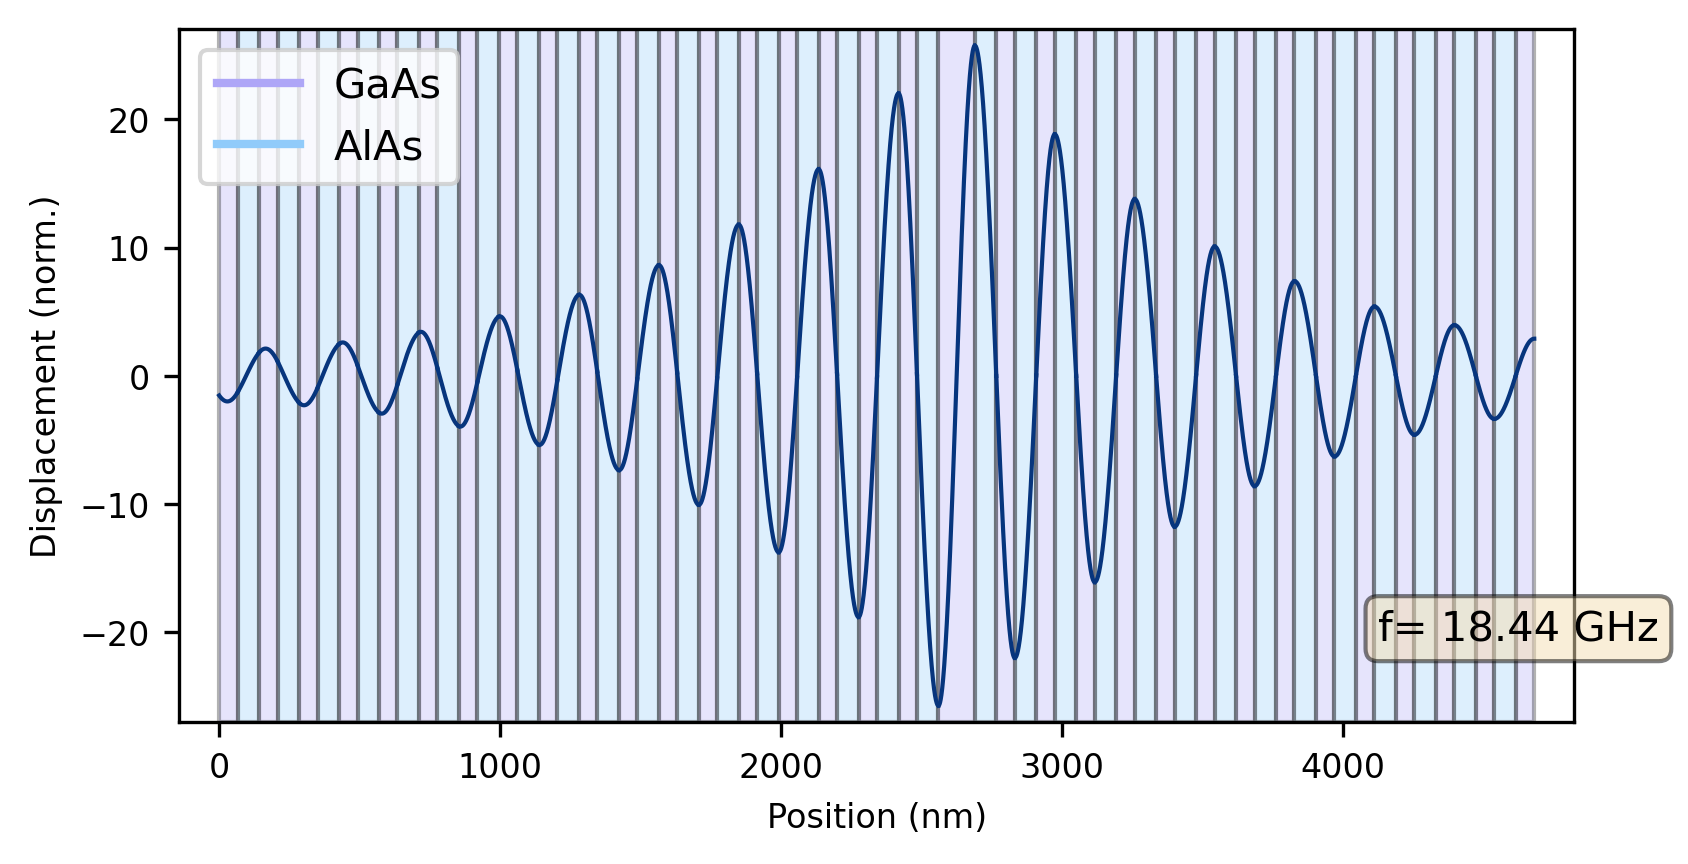

In [71]:
reso.plot_field('real')

In [70]:
opt = OpticalCavity([gaas_mod,alas_mod],[wl_DBR/4./gaas_mod.n,wl_DBR/4./alas_mod.n],915, entry=GaAs, exit=Air, p=(18,14), spacer=(GaAs,wl_DBR/2.0/GaAs.n))
reso = Resonator([gaas_mod,alas_mod],[wl_DBR/4./gaas_mod.n,wl_DBR/4./alas_mod.n],4780/18.44, entry=GaAs, exit=Air, p=(18,14), spacer=(GaAs,wl_DBR/2.0/GaAs.n))

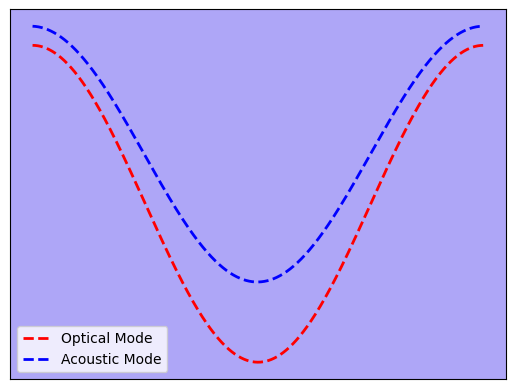

In [108]:
from math import ceil

fig, axe = plt.subplots()
reso.calc_complex_amplitudes()
opt.calc_complex_amplitudes()
eplus, eminus = (opt.Es[2*opt.p[0]+1][0],opt.Es[2*opt.p[0]+1][1])
zs = np.linspace(-opt.spacer[1],opt.spacer[1],1000*ceil(abs(eplus)))
axe.plot(zs,[opt.field_value(eplus, eminus, opt.kspacer, z) for z in zs],color="red",lw=2, ls='--', label='Optical Mode')
eplus, eminus = (reso.Es[2*reso.p[0]+1][0],reso.Es[2*reso.p[0]+1][1])
zs = np.linspace(-reso.spacer[1],reso.spacer[1],1000*ceil(abs(eplus)))
axe.plot(zs,[reso.field_value(eplus, eminus, reso.kspacer, z) + 5 for z in zs],color="blue",lw=2, ls='--', label='Acoustic Mode')
axe.set_xticks([])
axe.set_yticks([])
axe.set_facecolor("#aea6f7")
axe.legend()
#reso.plot_field('real')
#reso.plot_field('real')